In [1]:
#Import Library yang akan digunakan
#%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

In [2]:
#Menyimpan data dan memanggil  dataset
dfs = pd.read_csv('Data_Pelanggan_2.csv')
dfs.keys()

Index(['Umur', 'Yogurt Bark Fruity rasa apa yang anda sukai?'], dtype='object')

In [3]:
dfs = pd.DataFrame(dfs)
dfs.head()

,Umur,Yogurt Bark Fruity rasa apa yang anda sukai?
0,18,1
1,22,1
2,13,1
3,44,1
4,20,1


In [4]:
#Konversi data Array
X = np.asarray(dfs)
print(X)

[[18  1]
 [22  1]
 [13  1]
 [44  1]
 [20  1]
 [26  1]
 [25  1]
 [27  1]
 [21  1]
 [28  2]
 [14  1]
 [40  1]
 [11  1]
 [15  1]
 [29  1]
 [33  2]
 [31  2]
 [30  1]
 [38  1]
 [57  2]
 [52  1]
 [19  1]
 [39  1]
 [37  1]
 [61  1]
 [66  1]
 [33  1]
 [43  1]
 [48  1]
 [69  1]
 [14  1]
 [47  1]
 [32  1]
 [76  2]
 [65  1]
 [55  1]
 [58  1]
 [53  1]
 [35  2]
 [36  1]
 [42  1]
 [29  2]
 [12  1]
 [45  2]
 [89  1]
 [49  2]
 [10  2]
 [60  1]
 [23  1]
 [24  1]
 [78  1]
 [34  1]
 [87  1]
 [70  1]
 [72  1]
 [71  1]
 [54  1]
 [41  1]
 [46  2]
 [24  1]
 [41  1]
 [20  1]
 [43  1]
 [57  1]
 [75  1]
 [18  1]
 [71  1]
 [73  1]
 [74  1]
 [22  1]
 [23  1]
 [76  2]
 [77  1]
 [21  1]
 [78  1]
 [81  1]
 [19  1]
 [19  1]
 [18  1]
 [22  1]
 [24  2]
 [25  2]
 [21  1]
 [21  2]
 [25  2]
 [23  1]
 [21  1]
 [20  1]
 [25  1]
 [19  1]
 [18  1]]


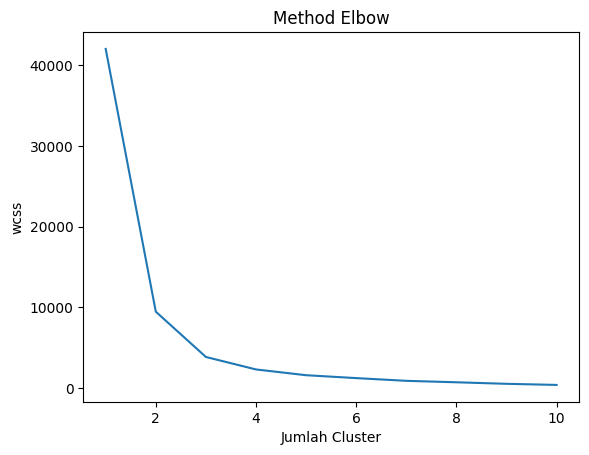

In [5]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init = 'k-means++', random_state= 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Method Elbow')
plt.xlabel('Jumlah Cluster')
plt.ylabel('wcss')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

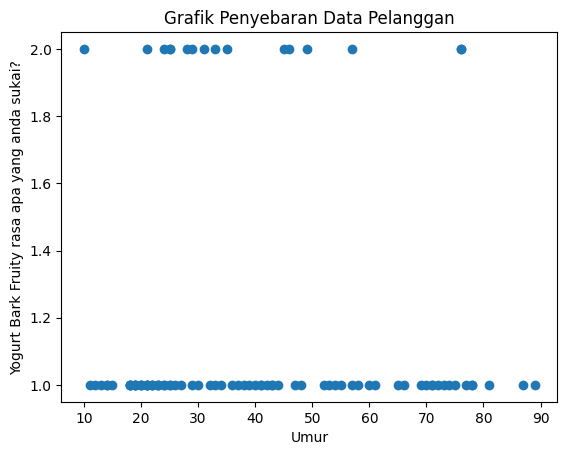

In [6]:
#Menampilkan data dalam bentuk scatter plot
plt.scatter(X[:,0], X[:,1], label='True Position')
plt.xlabel("Umur")
plt.ylabel("Yogurt Bark Fruity rasa apa yang anda sukai?")
plt.title("Grafik Penyebaran Data Pelanggan")
plt.show

In [7]:
#Mengaktifkan K_means dengan jumlah Kluster= 2
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

KMeans(n_clusters=2)

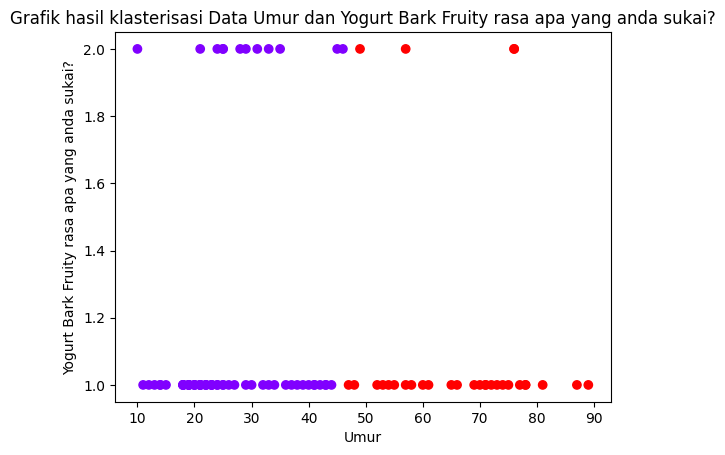

In [8]:
#Plot Data Point
#memvisualisasikan hasil kalasterisasi Data Pelanggan
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.xlabel("Umur")
plt.ylabel("Yogurt Bark Fruity rasa apa yang anda sukai?")
plt.title("Grafik hasil klasterisasi Data Umur dan Yogurt Bark Fruity rasa apa yang anda sukai?")
plt.show()

In [9]:
#Menampilkan nilai Centroid yang akan digenerate oleh algoritma
print(kmeans.cluster_centers_)

[[26.40983607  1.19672131]
 [66.63333333  1.13333333]]


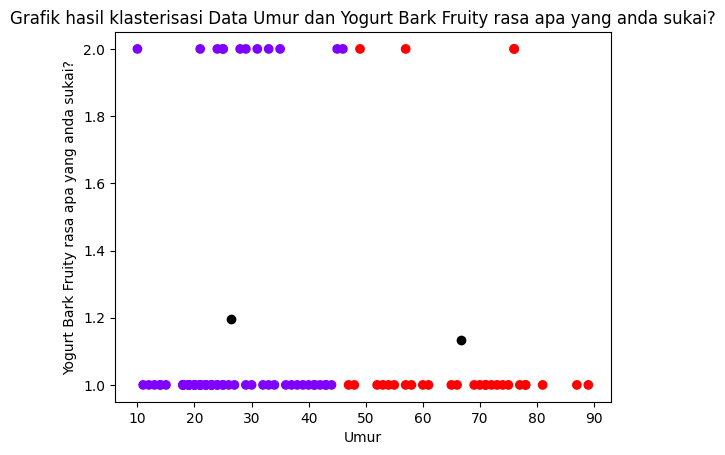

In [10]:
#Plot Data Point
#memvisualisasikan hasil kalasterisasi Data Pelanggan
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.xlabel("Umur")
plt.ylabel("Yogurt Bark Fruity rasa apa yang anda sukai?")
plt.title("Grafik hasil klasterisasi Data Umur dan Yogurt Bark Fruity rasa apa yang anda sukai?")
plt.show()

In [11]:
from sklearn.metrics import davies_bouldin_score

# Menghitung Davies-Bouldin Index
db_index = davies_bouldin_score(X, kmeans.labels_)
print("Davies-Bouldin Index:", db_index)

Davies-Bouldin Index: 0.44815581849592434


In [12]:
# Misalkan X adalah data Anda dan y adalah label kelas yang sebenarnya

# Menerapkan K-Means untuk melakukan clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

# Menggunakan hasil clustering untuk memprediksi label
y_pred = kmeans.predict(X)

# Membuat confusion matrix
# Asumsikan bahwa label prediksi dari K-Means merepresentasikan kelas
conf_matrix = confusion_matrix(y_pred, y_pred)

print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[30  0]
 [ 0 61]]


In [13]:
from sklearn.cluster import KMeans
import numpy as np

# Misalkan X adalah data Anda

# Memilih satu data sebagai titik centroid
centroid_index = 0  # Misalnya, pilih data pertama sebagai titik centroid
initial_centroids = np.array([X[centroid_index]])

# Inisialisasi model K-Means dengan satu titik centroid
kmeans = KMeans(n_clusters=1, init=initial_centroids, n_init=1)
kmeans.fit(X)

# Melihat posisi titik centroid
print("Centroid:")
print(kmeans.cluster_centers_)

Centroid:
[[39.67032967  1.17582418]]


In [14]:
from sklearn.metrics import euclidean_distances

# Misalkan X adalah data Anda dan kmeans adalah objek KMeans yang sudah dilatih
# Jika Anda menggunakan inisialisasi manual seperti sebelumnya, maka Anda perlu mengambil titik centroid dari objek kmeans.cluster_centers_
# Misalnya, jika titik centroid diambil dari objek kmeans, maka:
centroid = kmeans.cluster_centers_

# Menghitung jarak antara setiap data dengan titik centroid
distances = euclidean_distances(X, centroid)

# Menampilkan jarak untuk beberapa data pertama
print("Jarak antara data dengan centroid:")
print(distances[:5])  # Menampilkan jarak untuk lima data pertama

Jarak antara data dengan centroid:
[[21.67104294]
 [17.6712044 ]
 [26.67090922]
 [ 4.33323889]
 [19.67111546]]


In [15]:
# Misalkan X adalah data Anda dan kmeans adalah objek KMeans yang sudah dilatih
# Kmeans.cluster_centers_ adalah array yang berisi titik centroid yang dihasilkan dari pelatihan sebelumnya

# Melatih ulang model K-Means dengan data yang sama
kmeans.fit(X)

# Menampilkan nilai baru titik centroid setelah pelatihan ulang
print("Nilai baru titik centroid:")
print(kmeans.cluster_centers_)

Nilai baru titik centroid:
[[39.67032967  1.17582418]]
